<a href="https://colab.research.google.com/github/essteer/data-science/blob/main/src/nlp/nlp_nltk_text_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP - Text Processing with NLTK

This notebook explores basic applications of the NLTK (natural language toolkit) library to a text document.

Basic steps:

a) Tokenise into sentences and words.  
b) Remove stop words and punctuation.  
c) Lemmatise the words.  
d) Summarise the speech.

In [ ]:
# Full imports list
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from heapq import nlargest
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
ENCODING = "utf-8"
FILEPATH = "./Vesuvius Challenge 2023.txt"

In [ ]:
with open(FILEPATH, "r", encoding=ENCODING) as f:
    text = f.read()

text = text.lower()

In [ ]:
text[:1000]

'vesuvius challenge 2023 grand prize awarded: we can read the first scroll!\nthe 2000-year-old scroll discusses music, food, and how to enjoy life’s pleasures.\nfebruary 5th, 2024\nwe’re announcing the winners of the vesuvius challenge 2023 grand prize. we’ll look at how they did it, what the scrolls say, and what comes next.\n\njoin us for a celebration at the getty villa museum in los angeles on march 16th, 4pm. more information here.\n\nvictory\ntwo thousand years ago, a volcanic eruption buried an ancient library of papyrus scrolls now known as the herculaneum papyri.\n\nthe scrolls were carbonized by the eruption of mount vesuvius in 79 ad.\nin the 18th century the scrolls were discovered. more than 800 of them are now stored in a library in naples, italy; these lumps of carbonized ash cannot be opened without severely damaging them. but how can we read them if they remain rolled up?\n\n\nthe scroll read by the winners.\n\nresult of an attempt to physically unroll a scroll.\non ma

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [ ]:
nltk.download("stopwords")

In [ ]:
text = text.split("\n")

In [ ]:
text = [e.strip() for e in text]

In [ ]:
text = " ".join(text)

### Tokenise into sentences and words

In [ ]:
sentences = sent_tokenize(text)

In [ ]:
sentences[200:205]

['what’s next?',
 'announcing the 2024 vesuvius challenge grand prize.',
 'when we started the competition, most of us estimated that we had a less than 30% probability of success within the year.',
 'at that point, no letters had yet been discovered inside of a scroll.',
 'on top of that, the scrolls had barely been segmented at all.']

In [ ]:
words = word_tokenize(text)

In [ ]:
print(words[:200])

['vesuvius', 'challenge', '2023', 'grand', 'prize', 'awarded', ':', 'we', 'can', 'read', 'the', 'first', 'scroll', '!', 'the', '2000-year-old', 'scroll', 'discusses', 'music', ',', 'food', ',', 'and', 'how', 'to', 'enjoy', 'life', '’', 's', 'pleasures', '.', 'february', '5th', ',', '2024', 'we', '’', 're', 'announcing', 'the', 'winners', 'of', 'the', 'vesuvius', 'challenge', '2023', 'grand', 'prize', '.', 'we', '’', 'll', 'look', 'at', 'how', 'they', 'did', 'it', ',', 'what', 'the', 'scrolls', 'say', ',', 'and', 'what', 'comes', 'next', '.', 'join', 'us', 'for', 'a', 'celebration', 'at', 'the', 'getty', 'villa', 'museum', 'in', 'los', 'angeles', 'on', 'march', '16th', ',', '4pm', '.', 'more', 'information', 'here', '.', 'victory', 'two', 'thousand', 'years', 'ago', ',', 'a', 'volcanic', 'eruption', 'buried', 'an', 'ancient', 'library', 'of', 'papyrus', 'scrolls', 'now', 'known', 'as', 'the', 'herculaneum', 'papyri', '.', 'the', 'scrolls', 'were', 'carbonized', 'by', 'the', 'eruption', 

### Remove stopwords and punctuation

In [ ]:
stop_words = set(stopwords.words("english") + list(punctuation))
# Add custom puncutation found within the text
stop_words.update("’", "“", "”", "—")

In [ ]:
print(stop_words)

{'not', '”', 'had', 'too', 'himself', 'she', 'same', '$', 'y', '|', 'his', 'hers', 'were', 'it', 'through', 'most', 'wouldn', "wasn't", 'until', 'doing', 've', ')', 'a', 'haven', 'themselves', 'in', '"', 'only', '@', '!', 'have', 'over', 'can', 'no', 'above', 'few', 'the', 'will', '}', 'that', 'why', 'do', '.', '\\', 'yours', 'if', 'some', 'now', 'once', '*', 'my', 'ours', 'by', 'out', 'ma', 'for', 'hadn', 'after', 'those', '_', 'mightn', 'me', 'each', "hadn't", '=', 'as', 'doesn', 'up', "it's", 'but', '[', 'them', 'an', 'down', "she's", 'nor', 'didn', '&', 'very', 'should', 'did', 'to', 'how', 'who', "don't", 'her', 'he', 'from', 'what', 'weren', 'yourself', '{', 'ain', "doesn't", 'd', 'be', "mightn't", '/', 'here', 'when', '^', 'so', 'i', 'theirs', 'further', 'just', 'about', 'herself', ',', 'such', 'mustn', 'into', "needn't", 'while', "won't", "haven't", 'its', 'having', 'him', 'don', 'where', "'", '—', 'm', "shan't", "you'd", 'myself', 'is', "that'll", 'are', 'below', "didn't", 'sh

In [ ]:
len(words)

5372

In [ ]:
stripped_text = [word for word in words if word not in stop_words]

In [ ]:
print(stripped_text[:100])

['vesuvius', 'challenge', '2023', 'grand', 'prize', 'awarded', 'read', 'first', 'scroll', '2000-year-old', 'scroll', 'discusses', 'music', 'food', 'enjoy', 'life', 'pleasures', 'february', '5th', '2024', 'announcing', 'winners', 'vesuvius', 'challenge', '2023', 'grand', 'prize', 'look', 'scrolls', 'say', 'comes', 'next', 'join', 'us', 'celebration', 'getty', 'villa', 'museum', 'los', 'angeles', 'march', '16th', '4pm', 'information', 'victory', 'two', 'thousand', 'years', 'ago', 'volcanic', 'eruption', 'buried', 'ancient', 'library', 'papyrus', 'scrolls', 'known', 'herculaneum', 'papyri', 'scrolls', 'carbonized', 'eruption', 'mount', 'vesuvius', '79', 'ad', '18th', 'century', 'scrolls', 'discovered', '800', 'stored', 'library', 'naples', 'italy', 'lumps', 'carbonized', 'ash', 'opened', 'without', 'severely', 'damaging', 'read', 'remain', 'rolled', 'scroll', 'read', 'winners', 'result', 'attempt', 'physically', 'unroll', 'scroll', 'march', '15th', '2023', 'nat', 'friedman', 'daniel', 'gr

In [ ]:
len(stripped_text)

2633

In [ ]:
text_sans_stopwords = " ".join(stripped_text)

In [ ]:
text_sans_stopwords[:500]

'vesuvius challenge 2023 grand prize awarded read first scroll 2000-year-old scroll discusses music food enjoy life pleasures february 5th 2024 announcing winners vesuvius challenge 2023 grand prize look scrolls say comes next join us celebration getty villa museum los angeles march 16th 4pm information victory two thousand years ago volcanic eruption buried ancient library papyrus scrolls known herculaneum papyri scrolls carbonized eruption mount vesuvius 79 ad 18th century scrolls discovered 80'

### Lemmatise the words

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download("wordnet")

In [ ]:
lemmatizer = WordNetLemmatizer()

#### Lemmatise full text

In [ ]:
words = word_tokenize(text)

In [ ]:
lemmatized_words = [lemmatizer.lemmatize(word, pos="v") for word in words]

In [ ]:
text_lemmatized = " ".join(lemmatized_words)

In [ ]:
# View the results of the text with lemmatisation
text_lemmatized[:1000]

'vesuvius challenge 2023 grand prize award : we can read the first scroll ! the 2000-year-old scroll discuss music , food , and how to enjoy life ’ s pleasures . february 5th , 2024 we ’ re announce the winners of the vesuvius challenge 2023 grand prize . we ’ ll look at how they do it , what the scroll say , and what come next . join us for a celebration at the getty villa museum in los angeles on march 16th , 4pm . more information here . victory two thousand years ago , a volcanic eruption bury an ancient library of papyrus scroll now know as the herculaneum papyri . the scroll be carbonize by the eruption of mount vesuvius in 79 ad . in the 18th century the scroll be discover . more than 800 of them be now store in a library in naples , italy ; these lump of carbonize ash can not be open without severely damage them . but how can we read them if they remain roll up ? the scroll read by the winners . result of an attempt to physically unroll a scroll . on march 15th , 2023 , nat fri

In [ ]:
# View the same portion of text pre-lemmatisation for comparison
text[:1000]

'vesuvius challenge 2023 grand prize awarded: we can read the first scroll! the 2000-year-old scroll discusses music, food, and how to enjoy life’s pleasures. february 5th, 2024 we’re announcing the winners of the vesuvius challenge 2023 grand prize. we’ll look at how they did it, what the scrolls say, and what comes next.  join us for a celebration at the getty villa museum in los angeles on march 16th, 4pm. more information here.  victory two thousand years ago, a volcanic eruption buried an ancient library of papyrus scrolls now known as the herculaneum papyri.  the scrolls were carbonized by the eruption of mount vesuvius in 79 ad. in the 18th century the scrolls were discovered. more than 800 of them are now stored in a library in naples, italy; these lumps of carbonized ash cannot be opened without severely damaging them. but how can we read them if they remain rolled up?   the scroll read by the winners.  result of an attempt to physically unroll a scroll. on march 15th, 2023, n

#### Lemmatise text without stopwords

In [ ]:
words_sans_stopwords = word_tokenize(text_sans_stopwords)

In [ ]:
lemmatized_words_sans_stopwords = [lemmatizer.lemmatize(word, pos="v") for word in words_sans_stopwords]

In [ ]:
text_lemmatized_sans_stopwords = " ".join(lemmatized_words_sans_stopwords)

In [ ]:
text_lemmatized_sans_stopwords[:1000]

'vesuvius challenge 2023 grand prize award read first scroll 2000-year-old scroll discuss music food enjoy life pleasures february 5th 2024 announce winners vesuvius challenge 2023 grand prize look scroll say come next join us celebration getty villa museum los angeles march 16th 4pm information victory two thousand years ago volcanic eruption bury ancient library papyrus scroll know herculaneum papyri scroll carbonize eruption mount vesuvius 79 ad 18th century scroll discover 800 store library naples italy lump carbonize ash open without severely damage read remain roll scroll read winners result attempt physically unroll scroll march 15th 2023 nat friedman daniel gross brent seal launch vesuvius challenge answer question scroll institut de france image diamond light source particle accelerator near oxford release high-resolution ct scan scroll offer 1m prize put forward many generous donors seth parker scan scroll diamond light source particle accelerator artistic visualization const

### Summarise the speech

In [ ]:
from nltk.probability import FreqDist

In [ ]:
# Frequency distribution
frequencies = FreqDist(words_sans_stopwords)

In [ ]:
frequencies

FreqDist({'prize': 31, 'team': 30, 'scroll': 28, 'scrolls': 28, 'ink': 23, 'grand': 21, 'text': 20, 'read': 17, 'vesuvius': 16, 'first': 16, ...})

In [ ]:
counter = 0
for k, v in frequencies.items():
    if counter == 10:
        break
    print(f"{v:>5} - {k}")
    counter += 1

   16 - vesuvius
   15 - challenge
    7 - 2023
   21 - grand
   31 - prize
    2 - awarded
   17 - read
   16 - first
   28 - scroll
    2 - 2000-year-old


In [ ]:
from heapq import nlargest

In [ ]:
# Get n-largest words by frequency
nlargest(20, frequencies, key=frequencies.get)

['prize',
 'team',
 'scroll',
 'scrolls',
 'ink',
 'grand',
 'text',
 'read',
 'vesuvius',
 'first',
 'community',
 'challenge',
 'work',
 'segmentation',
 'many',
 'us',
 'still',
 'papyrus',
 'submission',
 'letters']

In [ ]:
from collections import defaultdict

In [ ]:
ranking = defaultdict(int)

In [ ]:
# Rank sentences based on frequencies of words contained
for i, sent in enumerate(sentences):
    for w in word_tokenize(sent):
        if w in frequencies:
            ranking[i] += frequencies[w]

In [ ]:
print(ranking)

defaultdict(<class 'int'>, {0: 153, 1: 57, 2: 116, 3: 51, 4: 46, 5: 10, 6: 88, 7: 57, 8: 41, 9: 32, 10: 21, 11: 60, 12: 43, 13: 70, 14: 73, 15: 78, 16: 67, 17: 21, 18: 66, 19: 24, 20: 85, 21: 25, 22: 57, 23: 41, 24: 180, 25: 53, 26: 23, 27: 138, 28: 26, 29: 79, 30: 72, 31: 69, 32: 16, 33: 38, 34: 155, 35: 32, 36: 138, 37: 21, 38: 125, 39: 61, 40: 117, 41: 78, 42: 28, 43: 70, 44: 26, 45: 79, 46: 74, 47: 41, 48: 103, 49: 31, 50: 85, 51: 71, 52: 85, 53: 9, 54: 36, 55: 33, 56: 29, 57: 100, 58: 60, 59: 37, 60: 14, 61: 8, 62: 46, 63: 14, 64: 54, 65: 13, 66: 56, 67: 73, 68: 35, 69: 81, 70: 73, 71: 81, 72: 48, 73: 17, 74: 35, 75: 50, 76: 81, 77: 28, 78: 57, 79: 75, 80: 94, 81: 70, 82: 16, 83: 105, 84: 16, 85: 143, 86: 14, 87: 96, 88: 60, 89: 53, 90: 20, 91: 11, 92: 27, 93: 9, 94: 39, 95: 35, 96: 19, 97: 18, 98: 39, 99: 97, 100: 49, 101: 72, 102: 83, 103: 39, 104: 76, 105: 60, 107: 4, 108: 73, 109: 36, 110: 16, 111: 5, 112: 12, 113: 92, 114: 57, 115: 37, 116: 23, 117: 67, 118: 92, 119: 55, 120:

In [ ]:
# Get the five highest-ranked sentences
sentences_index = nlargest(5, ranking, key=ranking.get)
sentences_index

[228, 24, 215, 165, 224]

In [ ]:
sentences[228]

'we’re also planning to help speed things along ourselves, balancing prizes and in-house expertise to continue the collaboration that worked so well in 2023. to this end, we’ll hire a small software/ml team, in addition to the full-time segmentation team, who will work in the open with our community to advance the state of the art.'

In [ ]:
sentences[24]

'grand prize we received many excellent submissions for the vesuvius challenge grand prize, several in the final minutes before the midnight deadline on january 1st.'

In [ ]:
sentences[215]

'the primary goal for 2024 is to read 90% of the scrolls, and we will issue the 2024 grand prize to the first team that is able to do this.'

In [ ]:
sentences[165]

'they spent two decades making the first scroll scans, building volume cartographer, demonstrating the first success in virtual unwrapping, and proving that herculaneum ink can be detected in ct.  brent seales, seth parker, and michael drakopoulos at the particle accelerator.'

In [ ]:
sentences[224]

'done right, this will also allow us to read the most challenging regions within the scroll – areas where the scroll was heavily compressed, cracked, delaminated, or otherwise damaged – which in many cases our current tools cannot even penetrate.'

#### Generate wordcloud based on the lemmatised text without stopwords

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

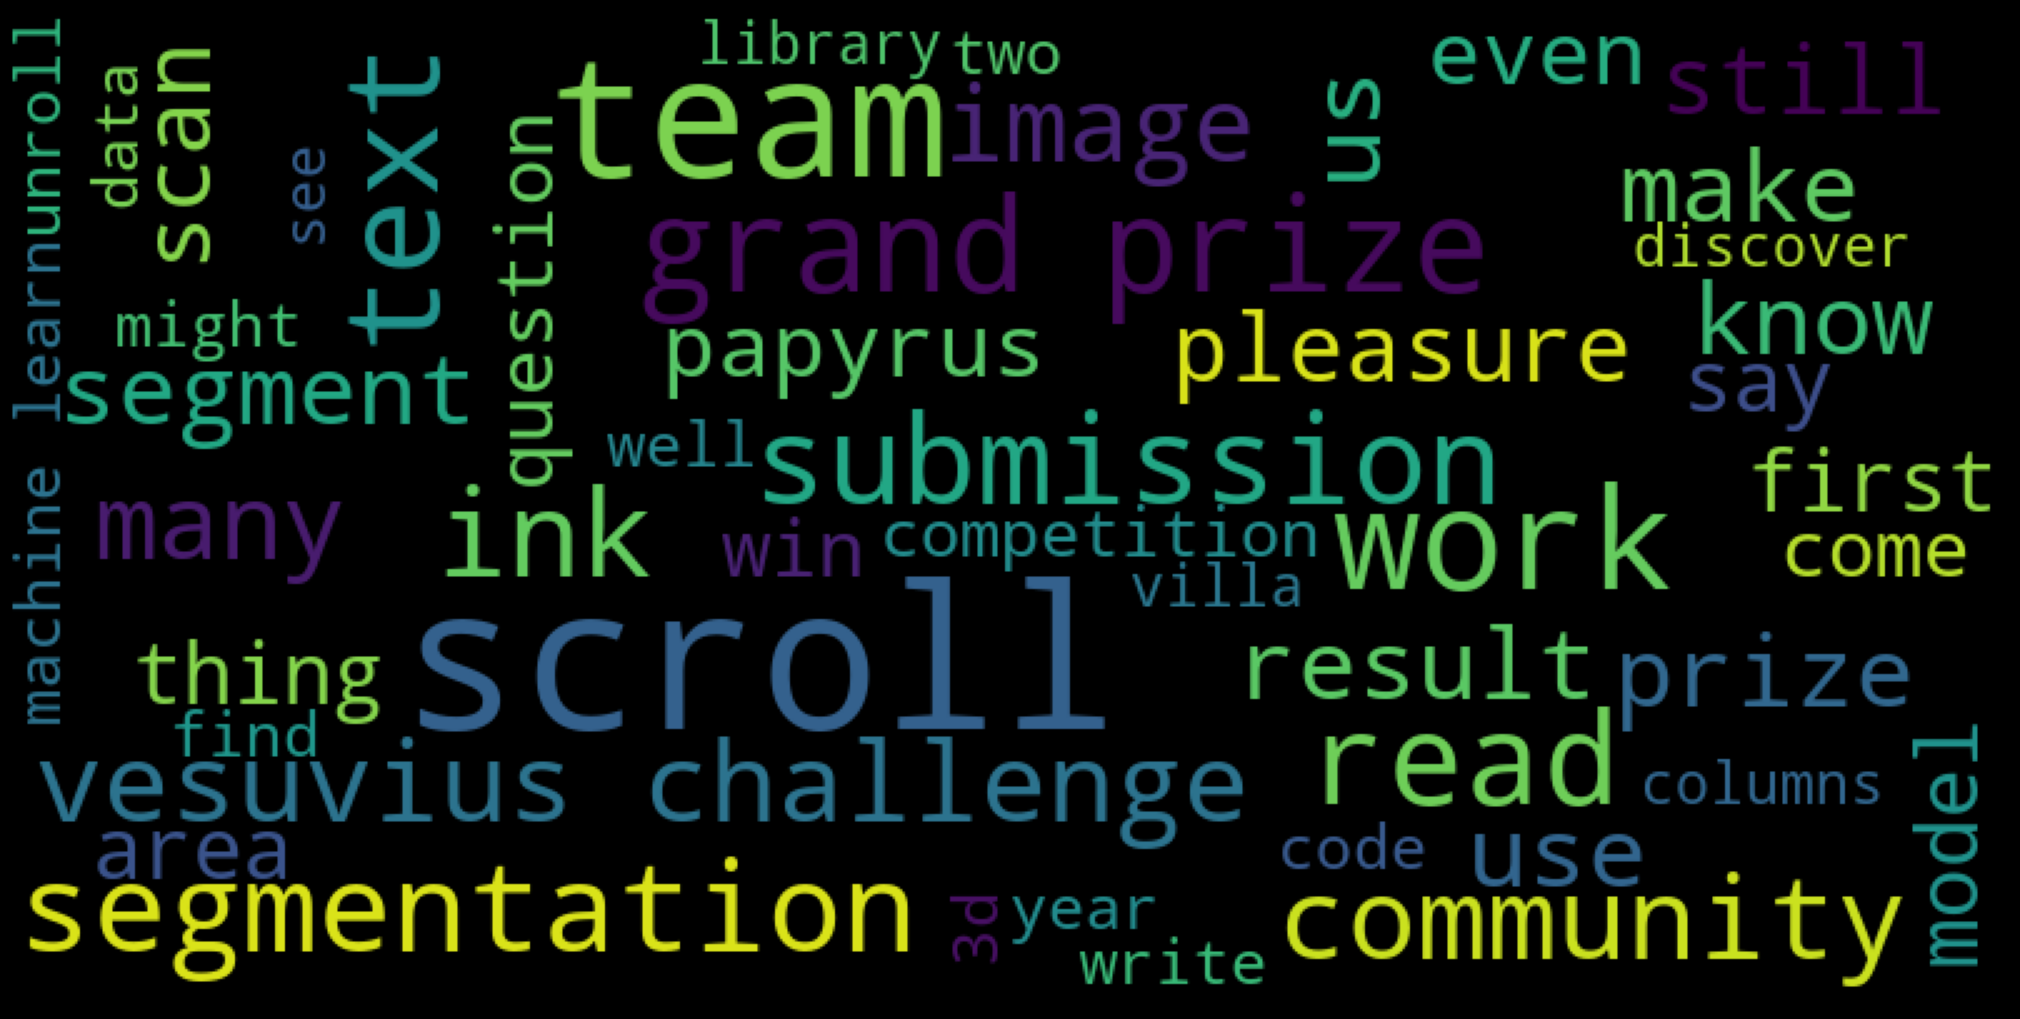

In [ ]:
wordcloud = WordCloud(
    # Set width and height to prevent image blurring
    width=800, height=400,
    max_font_size=80,
    max_words=50
).generate(text_lemmatized_sans_stopwords)

# Create wordcloud
plt.figure(figsize=(20,10), facecolor="k")  # Set facecolor to make border colour same
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)  # Set pad=0 to remove border
plt.show()